In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [8]:
# Create_engine to connect to your sqlite database.

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model

# reflect the tables

# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [10]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [115]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table -- using CORE, pure SQL
# YOUR CODE HERE

engine.execute("SELECT * From measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table -- using CORE, pure SQL
# YOUR CODE HERE

engine.execute("SELECT * From station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

### Reflect Database and Query

In [16]:
# Use SQLAlchemy automap_base() to reflect your tables into classes and 
# save a reference to those classes called Station and Measurement.
# View all of the classes that automap found
# Reflect Database into ORM class

Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement

In [17]:
# Save references to each table
# Reflect Database into ORM class

Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
# Start a session to query the database

session = Session(engine)

# Exploratory Precipitation Analysis

## GRADER PLEASE NOTE

* Some of the instructions are different from the original but still adhere to the rubric.
* The students get the average precipitation per day instead of every single precipitation value.

In [116]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

In [61]:
import datetime as dt
from dateutil.relativedelta import relativedelta
from sqlalchemy import and_

In [82]:
query_date = dt.date(2017, 8, 23)
type(query_date)
query_date

datetime.date(2017, 8, 23)

In [79]:
# 12 month relativedelta

twelve_mon_rel = relativedelta(months=12)
twelve_mon_rel


relativedelta(years=+1)

In [117]:
# Query for the date 12 months from '2017-08-23'` using the datetime library

query_date1 = dt.date(2017, 8, 23) - twelve_mon_rel
print("Query Date: ", query_date1)
type(query_date1)
query_date1

Query Date:  2016-08-23


datetime.date(2016, 8, 23)

In [150]:
# Using this date, find the average precipitation per day
# for the preceding 12 months of data sorted by ascending date.


twelve_month_prcp = session.query(Measurement.date, func.avg(Measurement.prcp)).\
        filter(and_(Measurement.date >= (dt.date(2017, 8, 23) - twelve_mon_rel),\
                Measurement.date <= dt.date(2017, 8, 23))).\
                group_by(func.strftime("%m", Measurement.date)).\
                order_by(Measurement.date).all()   
                            
twelve_month_prcp

[('2016-08-23', 0.19395522388059697),
 ('2016-09-01', 0.285549132947977),
 ('2016-10-01', 0.12162011173184357),
 ('2016-11-01', 0.12023391812865496),
 ('2016-12-01', 0.19949438202247183),
 ('2017-01-01', 0.07029411764705881),
 ('2017-02-01', 0.24111111111111108),
 ('2017-03-01', 0.17526627218934915),
 ('2017-04-01', 0.32111111111111107),
 ('2017-05-01', 0.15131736526946113),
 ('2017-06-01', 0.11999999999999998),
 ('2017-07-01', 0.13477272727272727)]

In [166]:
# Convert your results into a pandas DataFrame with date as index.
# 'twelve_month_data' is a list of tuples,which doesn't have any assigned names to it, so we are assigning names to the columns

df = pd.DataFrame(twelve_month_prcp, columns=['Date', 'Average_Precipitation'])
df['Average_Precipitation']

0     81.0
1     81.0
2     80.0
3     77.0
4     75.0
5     62.0
6     70.0
7     66.0
8     76.0
9     75.0
10    79.0
11    80.0
Name: Average_Precipitation, dtype: float64

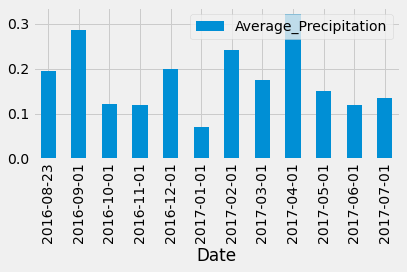

In [149]:
# Use Pandas Plotting with Matplotlib to plot the data
# to tell what the x_axis should be

df.set_index('Date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [172]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(df['Average_Precipitation'])
print(f"The average precipitation  is {mean_numpy}")

median_numpy = np.median(df['Average_Precipitation'])
print(f"The median average precipitation is {median_numpy}")

mode_scipy = sts.mode(df['Average_Precipitation'])
print(f"The mode average precipitation is {mode_scipy}")

The average precipitation  is 75.16666666666667
The median average precipitation is 76.5
The mode average precipitation is ModeResult(mode=array([75.]), count=array([2]))


# Exploratory Station Analysis

In [100]:
# Query total number of stations in dataset
total_stations = session.query(func.count(Measurement.station)).all()
total_stations

[(19550)]

In [145]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [146]:
# Using the station id from the previous query, calculate the lowest, 
# highest, and average temperature recorded for this station.

temp_aggregations = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()
temp_aggregations

[(85.0, 54.0, 71.66378066378067)]

In [153]:
# Query the last 12 months of temperature observation data for this station.
# Plot the results as a histogram with bins = 12.

twelve_month_tobs = session.query(Measurement.date, Measurement.tobs).\
        filter(and_(Measurement.date >= (dt.date(2017, 8, 23) - twelve_mon_rel),\
                Measurement.date <= dt.date(2017, 8, 23)), Measurement.station == 'USC00519281').\
                group_by(func.strftime("%m", Measurement.date)).\
                order_by(Measurement.date).all()  
twelve_month_tobs

[('2016-08-23', 77.0),
 ('2016-09-01', 80.0),
 ('2016-10-01', 77.0),
 ('2016-11-01', 74.0),
 ('2016-12-01', 74.0),
 ('2017-01-01', 72.0),
 ('2017-02-01', 68.0),
 ('2017-03-01', 71.0),
 ('2017-04-01', 74.0),
 ('2017-05-01', 65.0),
 ('2017-06-01', 80.0),
 ('2017-07-01', 79.0)]

In [ ]:
gapminder['lifeExp'].hist(bins=100)


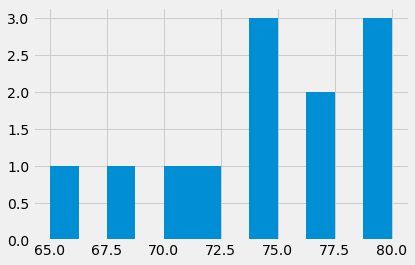

In [177]:
# Plot the results as a histogram with bins = 12
# 'twelve_month_data' is a list of tuples,which doesn't have any assigned names to it, so we are assigning names to the columns

df = pd.DataFrame(twelve_month_tobs, columns=['Date', 'Temperature'])
df['Temperature'].hist(bins=12)
#df.hist(column='Temperature', bins=12)



# Close session

In [ ]:
session.close()